[nltk_data] Downloading package punkt to
[nltk_data]     /Users/divyadarsi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/divyadarsi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/divyadarsi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy of BOW and TF_IDF Models

BOW Model Accuracy: 0.9452911293474013

BOW Model Classification Report:
               precision    recall  f1-score   support

         ham       0.97      0.94      0.95      1581
        spam       0.90      0.96      0.93       978

    accuracy                           0.95      2559
   macro avg       0.94      0.95      0.94      2559
weighted avg       0.95      0.95      0.95      2559


TF-IDF Model Accuracy: 0.9581867917155139

TF-IDF Model Classification Report:
               precision    recall  f1-score   support

         ham       0.97      0.96      0.97      1581
        spam       0.94      0.95      0.95       978

    accuracy                           0.96      2559
   macro avg       0.95      0.96      0.96      2559
weighted avg       0.96      0.96      0.96      2559



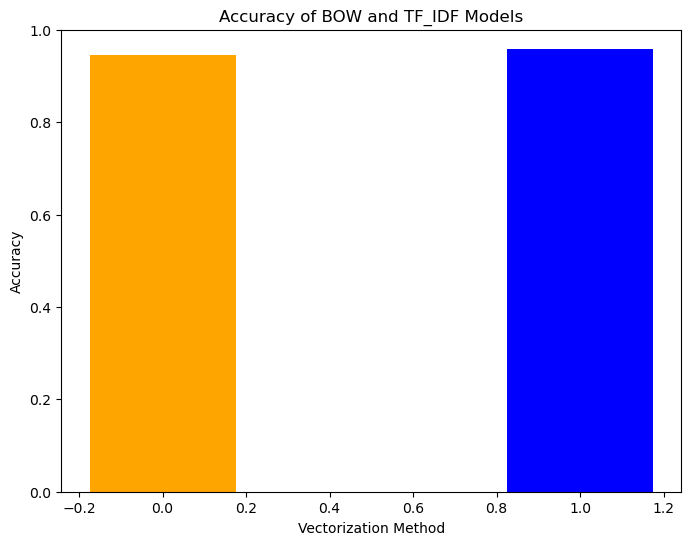

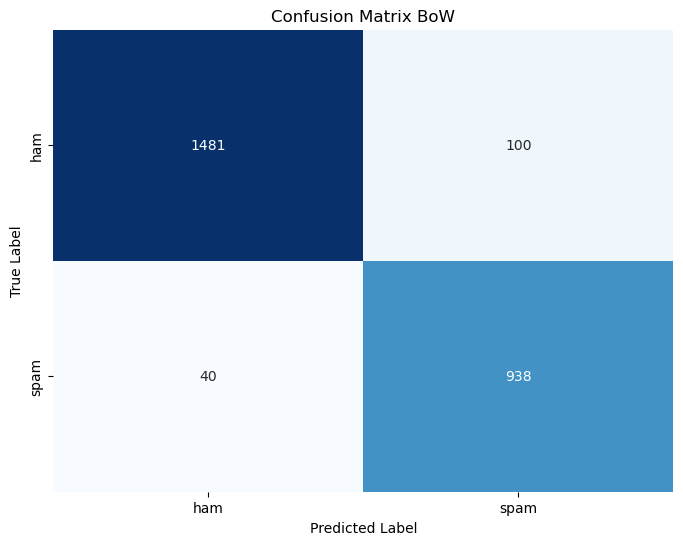

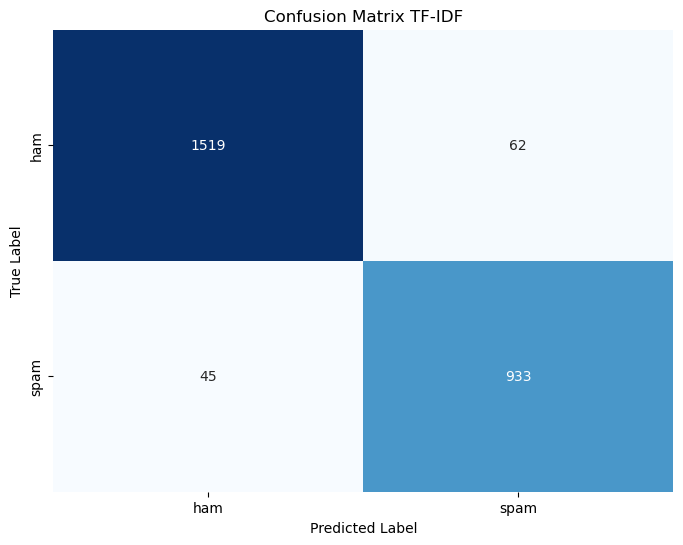

Accuracy of BOW and TF_IDF Models using K-fold

BOW Model Accuracy using K-fold: 0.9439661271759764

BOW Model Classification Report using K-fold:

              precision    recall  f1-score   support

         ham       0.97      0.94      0.95      4839
        spam       0.90      0.95      0.92      2835

    accuracy                           0.94      7674
   macro avg       0.93      0.94      0.94      7674
weighted avg       0.94      0.94      0.94      7674


TF-IDF Model Accuracy using K-fold: 0.9605153119943601

TF-IDF Model Classification Report using K-fold:

              precision    recall  f1-score   support

         ham       0.97      0.96      0.97      4839
        spam       0.94      0.96      0.95      2835

    accuracy                           0.96      7674
   macro avg       0.96      0.96      0.96      7674
weighted avg       0.96      0.96      0.96      7674



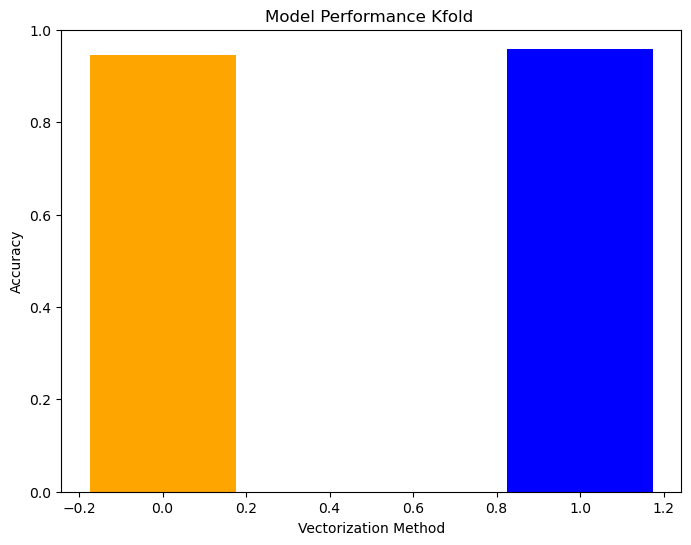

<Figure size 1200x800 with 0 Axes>

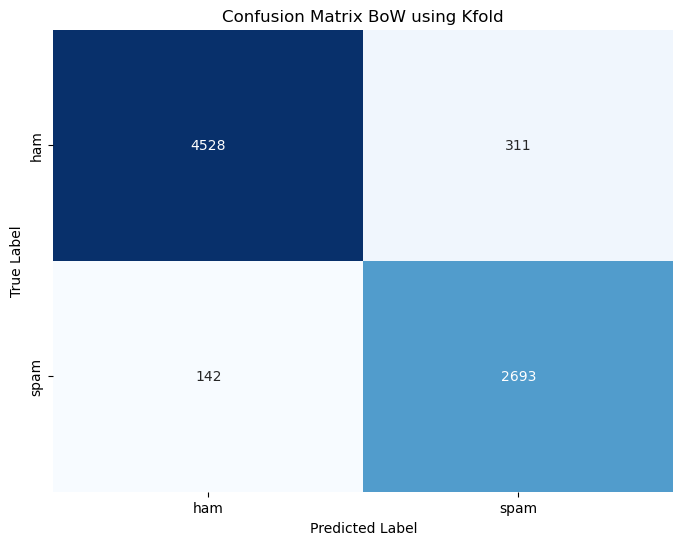

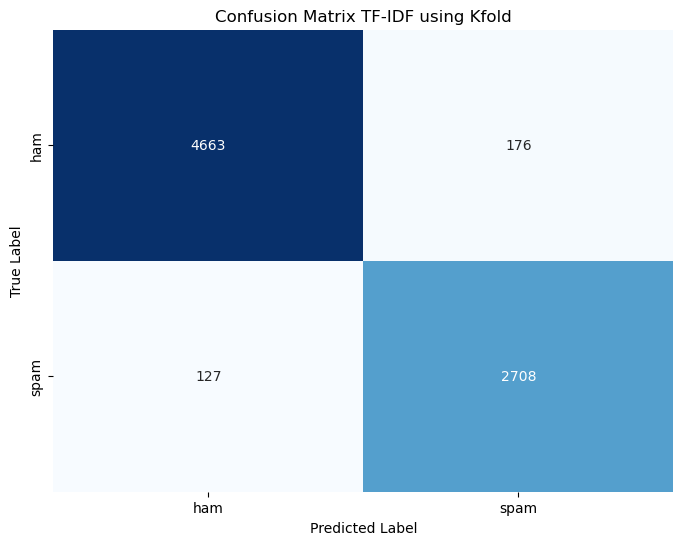


BOW, TF-IDF with and WithOut using K-Fold

BOW Model Accuracy: 0.9452911293474013

TF-IDF Model Accuracy: 0.9581867917155139

BOW Model Accuracy using K-fold: 0.9439661271759764

TF-IDF Model Accuracy using K-fold: 0.9605153119943601


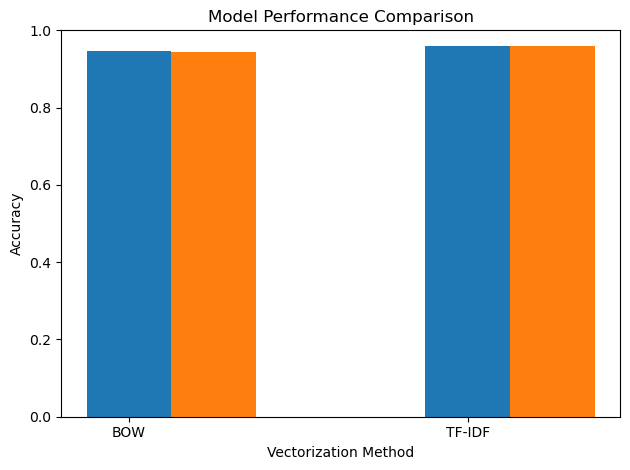


Model Performance Before and After Handling Imbalanced Data


BOW Model Accuracy (Before Handling Imbalanced Data): 0.9452911293474013

BOW Model Accuracy (After Handling Imbalanced Data): 0.9429464634622899

TF-IDF Model Accuracy (Before Handling Imbalanced Data): 0.9519343493552169

TF-IDF Model Accuracy (After Handling Imbalanced Data): 0.9574052364204767


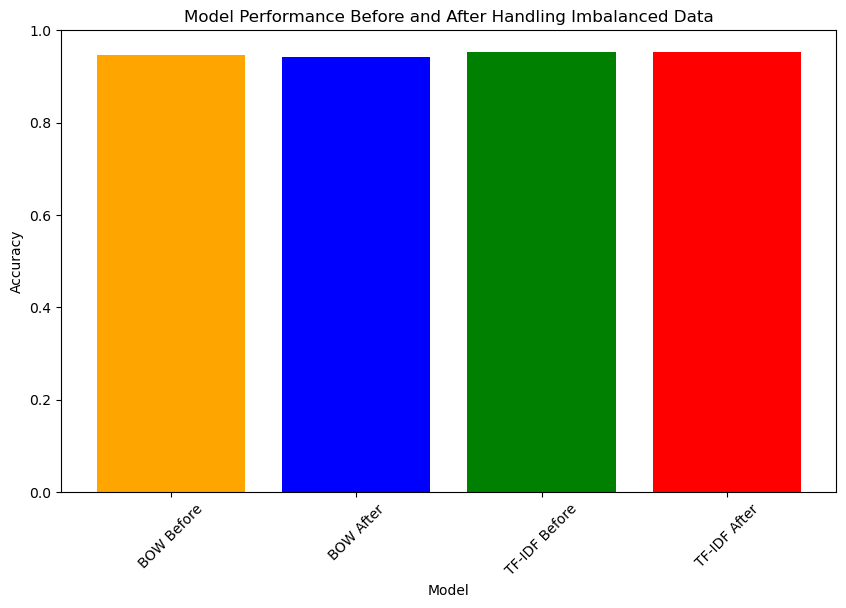

In [6]:
import os
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import pos_tag
from sklearn.model_selection import cross_val_predict


# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Load DataSet 
data_path = 'NLP_Dataset.csv'  # Update the path if necessary
data = pd.read_csv(data_path)

# Drop rows containing NaN values from X and y
data.dropna(subset=['Message', 'Category'], inplace=True)

# Define stopwords
stop_words = set(stopwords.words('english'))

# Initialize WordNet Lemmatizer and Porter Stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Preprocessing function with Lemmatization, Stemming, and POS tagging
def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and single characters
    tokens = [token for token in tokens if token.lower() not in stop_words and len(token) > 1]
    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Stem tokens
    stemmed_tokens = [stemmer.stem(token) for token in lemmatized_tokens]
    # Part-of-Speech tagging
    pos_tags = pos_tag(stemmed_tokens)
    # Filter only nouns, verbs, adjectives, and adverbs
    filtered_tokens = [word for word, tag in pos_tags if tag.startswith('N') or tag.startswith('V') or tag.startswith('J') or tag.startswith('R')]
    # Combine tokens back into a string
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

# Apply preprocessing
data['Message'] = data['Message'].apply(preprocess_text)

X = data['Message']
y = data['Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 1 - BOW and TF-IDF Accuracy (BOW, TF-IDF Accuracy and Classfication Report)

# Initialize and configure vectorizers 
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, ngram_range=(1, 2))

# Vectorize data using CountVectorizer 
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

# Vectorize data using TfidfVectorizer 
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize classifiers 
clf_bow = MultinomialNB()
clf_tfidf = MultinomialNB(alpha=0.1)

# Train the classifiers 
clf_bow.fit(X_train_counts, y_train)
clf_tfidf.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_bow = clf_bow.predict(X_test_counts)
y_pred_tfidf = clf_tfidf.predict(X_test_tfidf)

# Evaluate the classifiers after preprocessing
accuracy_bow = accuracy_score(y_test, y_pred_bow)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
report_bow = classification_report(y_test, y_pred_bow)
report_tfidf = classification_report(y_test, y_pred_tfidf)

print("Accuracy of BOW and TF_IDF Models")
print("\nBOW Model Accuracy:", accuracy_bow)
print("\nBOW Model Classification Report:\n", report_bow)
print("\nTF-IDF Model Accuracy:", accuracy_tfidf)
print("\nTF-IDF Model Classification Report:\n", report_tfidf)

# Define data for plotting accuracy
accuracy_before = [accuracy_bow, accuracy_tfidf]
# Define the labels
labels = ['BOW', 'TF-IDF']
# Plot the bar chart for accuracy 
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(2)
plt.bar(index, accuracy_before, bar_width, color=['orange', 'blue'])
plt.xlabel('Vectorization Method')
plt.ylabel('Accuracy')
plt.title('Accuracy of BOW and TF_IDF Models')
plt.ylim([0, 1])
plt.show()

# Confusion matrix for BOW
cm_bow_step1 = confusion_matrix(y_test, y_pred_bow)
# Confusion matrix for TF-IDF
cm_tfidf_step1 = confusion_matrix(y_test, y_pred_tfidf)

# Define the labels
labels = ['ham', 'spam']

# Plot confusion matrix for BOW (Step 1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bow_step1, annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix BoW')
plt.show()

# Plot confusion matrix for TF-IDF (Step 1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tfidf_step1, annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix TF-IDF')
plt.show()

# Step 2 - Kfold BOW and TF-IDF Accuracy and Classfication Report

# Initialize classifier for K-fold cross-validation
clf = MultinomialNB(alpha=0.1)

# Define K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-fold cross-validation with CountVectorizer
scores_bow = cross_val_score(clf, X_train_counts, y_train, cv=kf)

# Perform K-fold cross-validation with TfidfVectorizer
scores_tfidf = cross_val_score(clf, X_train_tfidf, y_train, cv=kf)

print("Accuracy of BOW and TF_IDF Models using K-fold")
print("\nBOW Model Accuracy using K-fold:", scores_bow.mean())
# Perform K-fold cross-validation with CountVectorizer after preprocessing
y_pred_bow_cv = cross_val_predict(clf_bow, X_train_counts, y_train, cv=kf)
print("\nBOW Model Classification Report using K-fold:\n")
print(classification_report(y_train, y_pred_bow_cv))
print("\nTF-IDF Model Accuracy using K-fold:", scores_tfidf.mean())
# Perform K-fold cross-validation with TfidfVectorizer after preprocessing
y_pred_tfidf_cv = cross_val_predict(clf_tfidf, X_train_tfidf, y_train, cv=kf)
print("\nTF-IDF Model Classification Report using K-fold:\n")
print(classification_report(y_train, y_pred_tfidf_cv))

# Define data for plotting
accuracy_after = [accuracy_bow, accuracy_tfidf]
accuracy_kfold = [scores_bow.mean(), scores_tfidf.mean()]
# Define the labels
labels = ['BOW', 'TF-IDF']
# Plot the bar chart for accuracy 
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(2)
plt.bar(index, accuracy_before, bar_width, color=['orange', 'blue'])
plt.xlabel('Vectorization Method')
plt.ylabel('Accuracy')
plt.title('Model Performance Kfold ')
plt.ylim([0, 1])
plt.show()

# Set up the figure and axis
plt.figure(figsize=(12, 8))
bar_width = 0.25
index = np.arange(2)

# Confusion matrix for BOW (K-fold)
cm_bow_step2 = confusion_matrix(y_train, y_pred_bow_cv)
# Confusion matrix for TF-IDF (K-fold)
cm_tfidf_step2 = confusion_matrix(y_train, y_pred_tfidf_cv)

# Define the labels
labels = ['ham', 'spam']

# Plot confusion matrix for BOW (K-fold)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bow_step2, annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix BoW using Kfold')
plt.show()

# Plot confusion matrix for TF-IDF (K-fold)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tfidf_step2, annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix TF-IDF using Kfold')
plt.show()


# Step 3 - BOW and TF-IDF with and without Kfold
print("\nBOW, TF-IDF with and WithOut using K-Fold")
print("\nBOW Model Accuracy:", accuracy_bow)
print("\nTF-IDF Model Accuracy:", accuracy_tfidf)
print("\nBOW Model Accuracy using K-fold:", scores_bow.mean())
print("\nTF-IDF Model Accuracy using K-fold:", scores_tfidf.mean())

# Plot the grouped bar charts
plt.bar(index + bar_width, accuracy_after, bar_width)
plt.bar(index + 2*bar_width, accuracy_kfold, bar_width)

# Add labels, title, and legend
plt.xlabel('Vectorization Method')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xticks(index + bar_width, ['BOW', 'TF-IDF'])

# Show plot
plt.ylim([0, 1])
plt.tight_layout()
plt.show()

# Step 4 - Handling Imbalanced Data using SMOTE

# Apply SMOTE to oversample the minority class for BOW
smote_bow = SMOTE(random_state=42)
X_train_balanced_bow, y_train_balanced_bow = smote_bow.fit_resample(X_train_counts, y_train)

# Initialize classifiers for BOW
clf_bow_before = MultinomialNB()  # BOW classifier before handling imbalance
clf_bow_after = MultinomialNB()   # BOW classifier after handling imbalance

# Train the BOW classifier before preprocessing
clf_bow_before.fit(X_train_counts, y_train)

# Make predictions using BOW before preprocessing
y_pred_bow_before = clf_bow_before.predict(X_test_counts)
print('\nModel Performance Before and After Handling Imbalanced Data\n')

# Evaluate the BOW classifier before preprocessing
accuracy_bow_before = accuracy_score(y_test, y_pred_bow_before)
print("\nBOW Model Accuracy (Before Handling Imbalanced Data):", accuracy_bow_before)

# Train the BOW classifier after preprocessing
clf_bow_after.fit(X_train_balanced_bow, y_train_balanced_bow)

# Make predictions using BOW after preprocessing
y_pred_bow_after = clf_bow_after.predict(X_test_counts)

# Evaluate the BOW classifier after preprocessing
accuracy_bow_after = accuracy_score(y_test, y_pred_bow_after)
print("\nBOW Model Accuracy (After Handling Imbalanced Data):", accuracy_bow_after)

# Apply SMOTE to oversample the minority class for TF-IDF
smote_tfidf = SMOTE(random_state=42)
X_train_balanced_tfidf, y_train_balanced_tfidf = smote_tfidf.fit_resample(X_train_tfidf, y_train)

# Initialize classifiers for TF-IDF
clf_tfidf_before = MultinomialNB()  # TF-IDF classifier before handling imbalance
clf_tfidf_after = MultinomialNB()   # TF-IDF classifier after handling imbalance

# Train the TF-IDF classifier before preprocessing
clf_tfidf_before.fit(X_train_tfidf, y_train)

# Make predictions using TF-IDF before preprocessing
y_pred_tfidf_before = clf_tfidf_before.predict(X_test_tfidf)

# Evaluate the TF-IDF classifier before preprocessing
accuracy_tfidf_before = accuracy_score(y_test, y_pred_tfidf_before)
print("\nTF-IDF Model Accuracy (Before Handling Imbalanced Data):", accuracy_tfidf_before)

# Train the TF-IDF classifier after preprocessing
clf_tfidf_after.fit(X_train_balanced_tfidf, y_train_balanced_tfidf)

# Make predictions using TF-IDF after preprocessing
y_pred_tfidf_after = clf_tfidf_after.predict(X_test_tfidf)

# Evaluate the TF-IDF classifier after preprocessing
accuracy_tfidf_after = accuracy_score(y_test, y_pred_tfidf_after)
print("\nTF-IDF Model Accuracy (After Handling Imbalanced Data):", accuracy_tfidf_after)

# Define data for plotting accuracy before and after handling imbalance
accuracy_before_imbalance = [accuracy_bow_before, accuracy_tfidf_before]
accuracy_after_imbalance = [accuracy_bow_after, accuracy_tfidf_after]

# Plot the bar chart for accuracy comparison
plt.figure(figsize=(10, 6))

models = ['BOW Before', 'BOW After', 'TF-IDF Before', 'TF-IDF After']
accuracy_scores = [accuracy_bow_before, accuracy_bow_after, accuracy_tfidf_before, accuracy_tfidf_before]

plt.bar(models, accuracy_scores, color=['orange', 'blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance Before and After Handling Imbalanced Data')
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.show()
